# Task 3
 * Part A - Fitting Simple Linear Regression Model

In [1]:
#Importing libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing and reading csv file
df=pd.read_csv("E:HIGGS_6M.csv")

In [3]:
# Anaylsing the distribution of classes
# data["column_name"].value_counts(), returns unique values in that column

print(df['1.000000000000000000e+00'].value_counts())
print('Zeros', round(df['1.000000000000000000e+00'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Ones', round(df['1.000000000000000000e+00'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

1.0    3178344
0.0    2821655
Name: 1.000000000000000000e+00, dtype: int64
Zeros 47.03 % of the dataset
Ones 52.97 % of the dataset


In [4]:
Ones_df = df.loc[df['1.000000000000000000e+00'] == 1][0:2500] # smaples which have fraud
Zeros_df = df.loc[df['1.000000000000000000e+00'] == 0][0:2500] #   

normal_distributed_df = pd.concat([Ones_df, Zeros_df])

# Shuffle dataframe rows
df_new= normal_distributed_df.sample(frac=1, random_state=100)

print(df_new['1.000000000000000000e+00'].value_counts()/len(df))

0.0    0.000417
1.0    0.000417
Name: 1.000000000000000000e+00, dtype: float64


In [5]:
# separating dependent and independent feature

X = df_new.drop("1.000000000000000000e+00",axis=1) 
y = df_new["1.000000000000000000e+00"]

In [6]:
#Splitting the dataset into the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 99)

In [7]:
#Putting the values in the same scale
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#Adding x0 = 1 to each instance for the bias term

X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

In [8]:
#Fitting logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0)
logmodel.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [9]:
#Prdicting the test set results
y_pred = logmodel.predict(X_test)

In [10]:
from sklearn.metrics import roc_curve
false_positive, true_positive, threshold1 = roc_curve(y_test, y_pred)

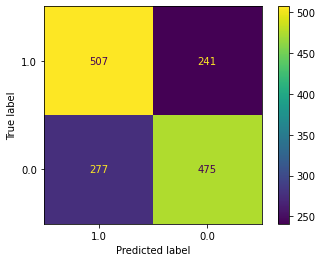

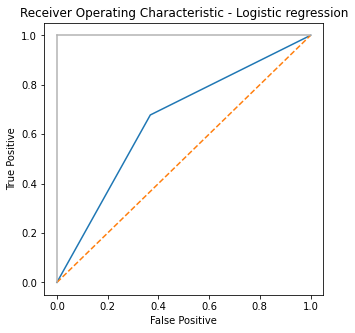

Accuracy Obtained=  0.6546666666666666


In [11]:
# Plotting 
# Confusion Matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

class_labels = df_new['1.000000000000000000e+00'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

# ROC Plot
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive, true_positive)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

# Calculating model accuarcy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Obtained= ",accuracy)

In [12]:
df_test=df[5499999:]

# separating dependent and independent feature

X_final_test= df_test.drop("1.000000000000000000e+00",axis=1) 
y_final_test = df_test["1.000000000000000000e+00"]

In [13]:
#Feature Normalization
# standardization-or-mean-removal-and-variance-scaling
X_final_test = scalar.transform(X_final_test)

#Adding x0 = 1 to each instance for the bias term
X_final_test = np.concatenate((np.ones((X_final_test.shape[0],1)),X_final_test),axis=1)

In [14]:
#Prdicting the test set results
y_final_pred = logmodel.predict(X_final_test)

In [15]:
false_positive_test, true_positive_test, threshold1 = roc_curve(y_final_test, y_final_pred)

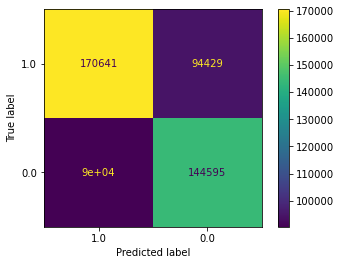

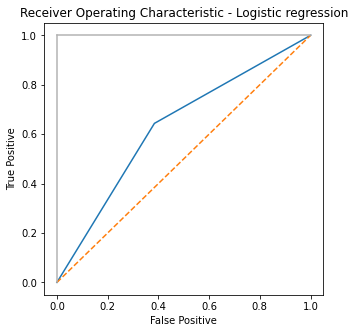

Accuracy Obtained=  0.630472


In [16]:
# Plotting 
# Confusion Matrix

class_labels = df_test['1.000000000000000000e+00'].unique()
cm_new = confusion_matrix(y_final_test,y_final_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_new, display_labels=class_labels)
disp.plot()

# ROC Plot
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_test, true_positive_test)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

# Calculating model accuarcy
accuracy=accuracy_score(y_final_test,y_final_pred)
print("Accuracy Obtained= ",accuracy)